# Data Exploration

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pygsp
from pygsp import graphs, filters
import networkx as nx
import pickle
import collections
from numpy import linalg


In [3]:
#import the three directed graphs: 
G_StephenHawking = nx.read_gpickle('../data/G_StephenHawking.gpickle')
G_StanLee = nx.read_gpickle('../data/G_StanLee.gpickle')
G_AlanRickman = nx.read_gpickle('../data/G_AlanRickman.gpickle')


In [4]:
#make undirected versions
G_StanLee_undir=G_StanLee.to_undirected()
G_StephenHawking_undir=G_StephenHawking.to_undirected()
G_AlanRickman_undir=G_AlanRickman.to_undirected()

In [5]:
#Adjacency matrices of directed graphs
A_StephenHawking = nx.adjacency_matrix(G_StephenHawking).todense()
A_StanLee=nx.adjacency_matrix(G_StanLee).todense()
A_AlanRickman = nx.adjacency_matrix(G_AlanRickman).todense()


In [6]:
#Adjacency matrices of undirected graphs
A_StephenHawking_undir = nx.adjacency_matrix(G_StephenHawking_undir).todense()
A_StanLee_undir = nx.adjacency_matrix(G_StanLee_undir).todense()
A_AlanRickman_undir = nx.adjacency_matrix(G_AlanRickman_undir).todense()

In [7]:
Names= ['StephenHawking' ,'StanLee','AlanRickman']
Graphs=[ G_StephenHawking, G_StanLee, G_AlanRickman]
Graphs_undir =[ G_StephenHawking_undir,G_StanLee_undir, G_AlanRickman_undir]

# Basic properties of the graphs


We study basic properties of the graphs such as number of nodes, number of edges, strongly connectedness, the diameter, the average clustering coefficient and number of triangles and global clustering coefficient 


In [8]:
#Number of nodes and edges for each graphs 
for G, name in zip (Graphs, Names) :
    print ('The graph G_{} has {} nodes and {} edges '. format( name, len(G.nodes),len(G.edges)))

The graph G_StephenHawking has 2701 nodes and 26921 edges 
The graph G_StanLee has 2701 nodes and 33469 edges 
The graph G_AlanRickman has 2701 nodes and 28012 edges 


In [9]:
# Check if the graphs are strongly connected (if not, diameter=infinity)
for G, name in zip (Graphs, Names) :
    if nx.is_strongly_connected(G):
        print('The graph G_{} is strongly connected and its diameter is {}'.format( name, nx.diameter(G)))
    else: 
        print('The graph G_{} is not strongly connected'.format(name))
  

The graph G_StephenHawking is not strongly connected
The graph G_StanLee is not strongly connected
The graph G_AlanRickman is not strongly connected


In [10]:
#return a list of nodes for the stronlgy connected components of a directed graph, how does this work??
for G, n in zip(Graphs, Names):
    strongcc=nx.strongly_connected_components(G)
    

In [11]:
for G, name in zip(Graphs,Names):
    print('The graph G_{} has {} strongly connect'.format(name, nx.number_strongly_connected_components(G)))

The graph G_StephenHawking has 51 strongly connect
The graph G_StanLee has 55 strongly connect
The graph G_AlanRickman has 55 strongly connect


In [12]:
#compute the diameter of undirected graphs:
for G, name in zip(Graphs_undir, Names) : 
    print('The diameter of the undirected graph G_{} is {}'.format(name, nx.diameter(G)))

The diameter of the undirected graph G_StephenHawking is 7
The diameter of the undirected graph G_StanLee is 7
The diameter of the undirected graph G_AlanRickman is 8


# Clustering coefficients and number of triangles

In [13]:
#compute average clustering coefficient: 
for G, name in zip(Graphs,Names):
    print('The graph G_{} has average clustering coefficient {}'.format(name,nx.average_clustering(G)))


The graph G_StephenHawking has average clustering coefficient 0.13762486811289285
The graph G_StanLee has average clustering coefficient 0.13116636151327363
The graph G_AlanRickman has average clustering coefficient 0.12266346600193209


In [14]:
#compute the number of triangles in each graph:
T_StanLee=sum(nx.triangles(G_StanLee_undir).values())/3
T_StephenHawking=sum(nx.triangles(G_StephenHawking_undir).values())/3
T_AlanRickman=sum(nx.triangles(G_AlanRickman_undir).values())/3

In [15]:
#compute number of 3-paths in the graphs:
P3_SL=np.sum(np.linalg.matrix_power(A_StanLee,3))
P3_SH=np.sum(np.linalg.matrix_power(A_StephenHawking,3))
P3_AR=np.sum(np.linalg.matrix_power(A_AlanRickman,3))

In [16]:
#compute global clustering coefficient of the graphs = number of triangles/number of 3-paths
C_StanLee=T_StanLee/P3_SL
C_StephenHawking=T_StephenHawking/P3_SH
C_AlanRickman=T_AlanRickman/P3_AR

In [17]:
print('The graph G_StanLee has {} triangles and global clustering coefficient {}'. format(int(T_StanLee), C_StanLee))
print('The graph G_StephenHawking has {} triangles and global clustering coefficient {}'. format(int(T_StephenHawking), C_StephenHawking))
print('The graph G_AlanRickman has {} triangles and global clustering coefficient {}'. format(int(T_AlanRickman), C_AlanRickman))



The graph G_StanLee has 60096 triangles and global clustering coefficient 0.003076009937657771
The graph G_StephenHawking has 41973 triangles and global clustering coefficient 0.0028240297052965243
The graph G_AlanRickman has 38076 triangles and global clustering coefficient 0.0028747681936903383


# Degrees histograms of the graphs


In [18]:
#plot the degree histograms  
def plot_degree(G, name):
    degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  

    degreeCount = collections.Counter(degree_sequence) #number of nodes with given degree 
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)

    plt.title("Total Degree Histogram for G_"+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.yscale('log')
 
    plt.show()

In [19]:
 #plot the in-degree histograms of a directed graph 
def plot_in_degree(G, name):
    degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  
    
    degreeCount = collections.Counter(degree_sequence) #number of nodes with given in- degree 
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    
    plt.title("In-Degree Histogram for G_"+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.yscale('log')
 
    plt.show()

In [20]:
#plot the out-degree histograms of a directed graph 
def plot_out_degree(G, name):
    degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True) 

    degreeCount = collections.Counter(degree_sequence)  # number of nodes with given out-degree 
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
 
    plt.title("Out-Degree Histogram for G_"+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.yscale('log')
   
    plt.show()

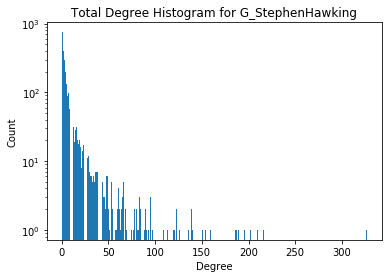

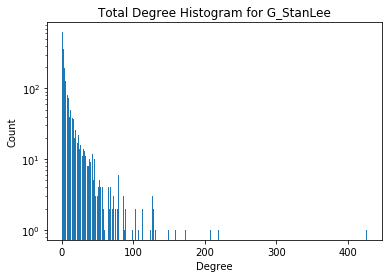

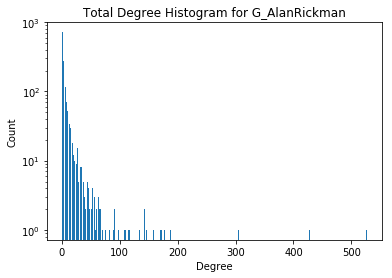

In [21]:
#Plot the degree histograms for the graphs
for  G, name in zip(Graphs,Names): 
    plot_degree(G, name)


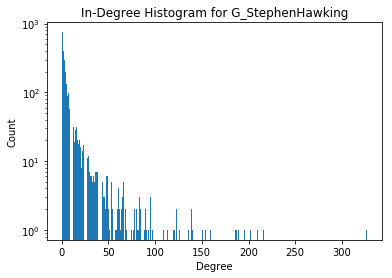

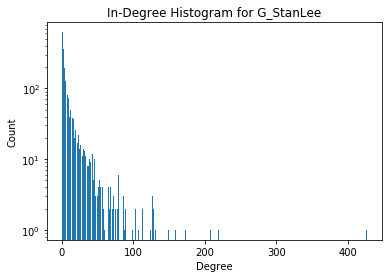

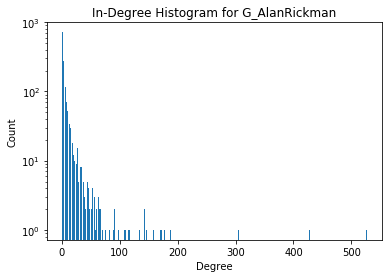

In [22]:
#plot in-degrees for the graphs
for G,name in zip(Graphs,Names): 
    plot_in_degree(G,name)

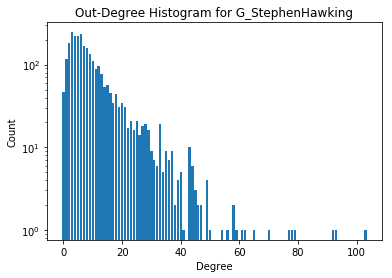

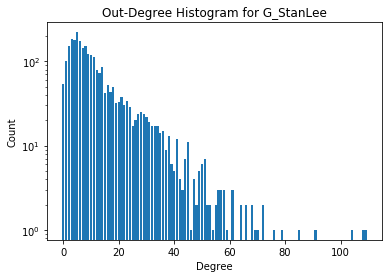

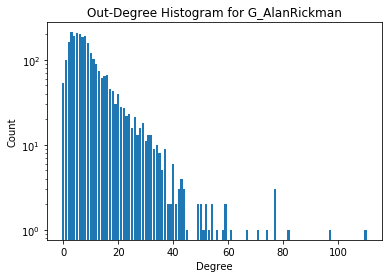

In [23]:
#Plot the out-degree histograms of the graphs
for G, name in zip(Graphs,Names): 
    plot_out_degree(G,name)
 